<h2>Import bibliotek</h2>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h2>Zadanie</h2>

Wczytanie zbioru danych populacji

In [20]:
# Read population data
population_data = pd.io.parsers.read_csv("things/population.dat", header = None, names = ['year', 'population'])

population_data

,year,population
0,1900,76212168
1,1910,92228496
2,1920,106021537
3,1930,123202624
4,1940,132164569
5,1950,151325798
6,1960,179323175
7,1970,203302031
8,1980,226542199
9,1990,248709873


Definicja zbiorów funkcji bazowych

In [7]:
# 1st base function
def base_function_1(j, t):
    return t ** (j-1)

# 2nd base function
def base_function_2(j, t):
    return (t-1900) ** (j-1)

# 3rd base function
def base_function_3(j, t):
    return (t-1940) ** (j-1)

# 4th base function
def base_function_4(j, t):
    return ((t-1940) / 40) ** (j-1)

# array of base functions
base_functions = np.array([base_function_1, base_function_2, base_function_3, base_function_4])

<h3>a) Utworzenie macierzy Vandermonde'a dla danych zbiorów funkcji</h3>

In [53]:
# function returning the Vandermonde matrix for given set of functions
def create_vandermonde_matrix(function, points):
    return function(np.array(range(1,len(points)))[:,np.newaxis], points[:,0]).T

create_vandermonde_matrix(base_functions, population_data[population_data['year'] <= 1980].values)

TypeError: 'numpy.ndarray' object is not callable

<h3>a) Wczytanie zbiorów</h3>

In [2]:
# read names of columns
column_names = [arr[0] for arr in pd.io.parsers.read_csv("things/dataset/breast-cancer.labels", header = None).values.tolist()]

# read training data
data_training = pd.io.parsers.read_csv("things/dataset/breast-cancer-train.dat", header = None, names=column_names)

# read validation data
data_validation = pd.io.parsers.read_csv("things/dataset/breast-cancer-validate.dat", header = None, names=column_names)

<h4>Wyświetlenie zbiorów danych</h4>

Dane treningowe

In [3]:
data_training

,patient ID,Malignant/Benign,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),...,radius (worst),texture (worst),perimeter (worst),area (worst),smoothness (worst),compactness (worst),concavity (worst),concave points (worst),symmetry (worst),fractal dimension (worst)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,891923,B,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,...,14.67,16.93,94.17,661.1,0.11700,0.10720,0.03732,0.05802,0.2823,0.06794
296,891936,B,10.91,12.35,69.14,363.7,0.08518,0.04721,0.01236,0.01369,...,11.37,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643
297,892189,M,11.76,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,...,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915
298,892214,B,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676


Dane walidacyjne

In [4]:
data_validation

,patient ID,Malignant/Benign,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),...,radius (worst),texture (worst),perimeter (worst),area (worst),smoothness (worst),compactness (worst),concavity (worst),concave points (worst),symmetry (worst),fractal dimension (worst)
0,892438,M,19.530,18.90,129.50,1217.0,0.11500,0.16420,0.219700,0.10620,...,25.93,26.24,171.10,2053.0,0.1495,0.41160,0.61210,0.19800,0.2968,0.09929
1,892604,B,12.460,19.89,80.43,471.3,0.08451,0.10140,0.068300,0.03099,...,13.46,23.07,88.13,551.3,0.1050,0.21580,0.19040,0.07625,0.2685,0.07764
2,89263202,M,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.228300,0.12800,...,23.68,29.43,158.80,1696.0,0.1347,0.33910,0.49320,0.19230,0.3294,0.09469
3,892657,B,10.490,18.61,66.86,334.3,0.10680,0.06678,0.022970,0.01780,...,11.06,24.54,70.76,375.4,0.1413,0.10440,0.08423,0.06528,0.2213,0.07842
4,89296,B,11.460,18.16,73.59,403.1,0.08853,0.07694,0.033440,0.01502,...,12.68,21.61,82.69,489.8,0.1144,0.17890,0.12260,0.05509,0.2208,0.07638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,924934,B,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,...,10.84,34.91,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283
256,924964,B,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.65,22.88,67.88,347.3,0.1265,0.12000,0.01005,0.02232,0.2262,0.06742
257,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,...,10.49,34.24,66.50,330.6,0.1073,0.07158,0.00000,0.00000,0.2475,0.06969
258,925277,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.48,27.27,105.90,733.5,0.1026,0.31710,0.36620,0.11050,0.2258,0.08004


<h3>b) Stworzenie histogramu i wykresu dla danych dla kolumny area (mean)</h3>

In [5]:
data_column = 'area (mean)'

Podzielenie danych ze względu na typ nowotworu

In [6]:
# split training data in respect to cancer type
data_training_malignant = data_training[data_training['Malignant/Benign'] == 'M']
data_training_benign = data_training[data_training['Malignant/Benign'] == 'B']

# split validation data in respect to cancer type
data_validation_malignant = data_validation[data_validation['Malignant/Benign'] == 'M']
data_validation_benign = data_validation[data_validation['Malignant/Benign'] == 'B']

<h4>Histogramy dla danych</h4>

Histogram dla danych treningowych

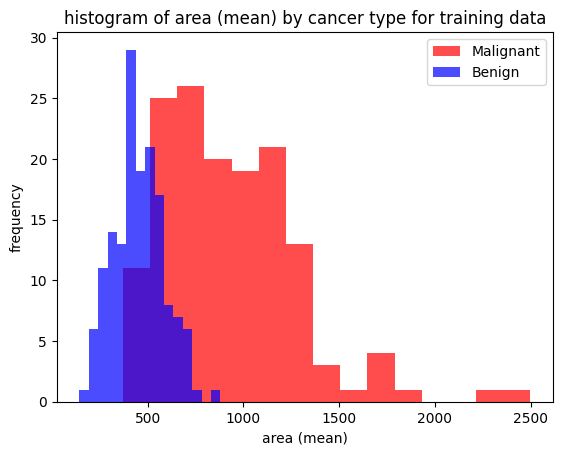

In [7]:
plt.hist(data_training_malignant[data_column], bins=15, alpha=0.7, color="red", label="Malignant")
plt.hist(data_training_benign[data_column], bins=15, alpha=0.7, color="blue", label="Benign")
plt.xlabel(data_column)
plt.ylabel("frequency")
plt.title(f"histogram of {data_column} by cancer type for training data")
plt.legend()
plt.show()

Histogram dla danych walidacyjnych

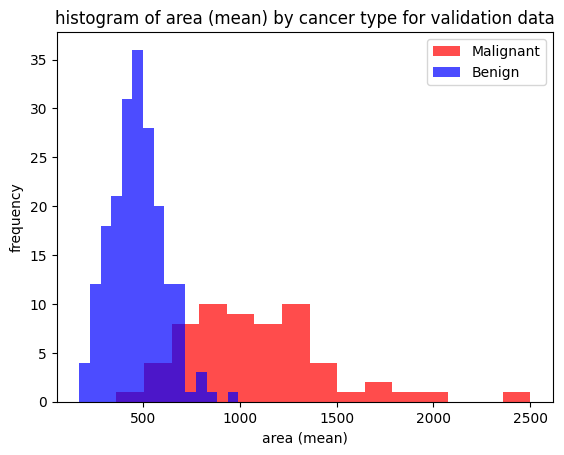

In [8]:
plt.hist(data_validation_malignant[data_column], bins=15, alpha=0.7, color="red", label="Malignant")
plt.hist(data_validation_benign[data_column], bins=15, alpha=0.7, color="blue", label="Benign")
plt.xlabel(data_column)
plt.ylabel("frequency")
plt.title(f"histogram of {data_column} by cancer type for validation data")
plt.legend()
plt.show()

<h4>Wykresy dla danych</h4>

Wykresy dla danych treningowych

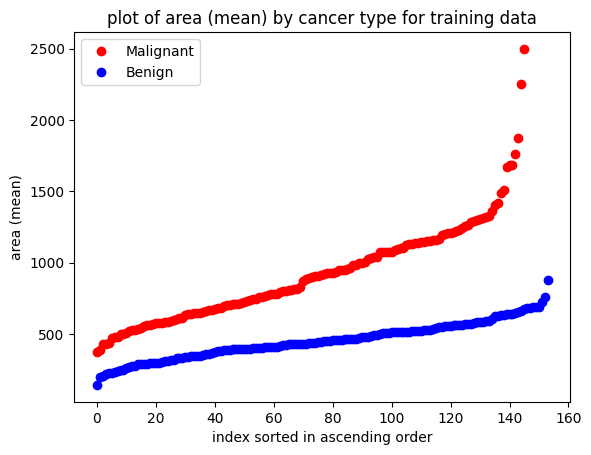

In [9]:
plt.plot(sorted(data_training_malignant[data_column]), label="Malignant", color="red", marker='o', linestyle='')
plt.plot(sorted(data_training_benign[data_column]), label="Benign", color="blue", marker='o', linestyle='')
plt.xlabel("index sorted in ascending order")
plt.ylabel(data_column)
plt.title(f"plot of {data_column} by cancer type for training data")
plt.legend()
plt.show()

Histogram dla danych walidacyjnych

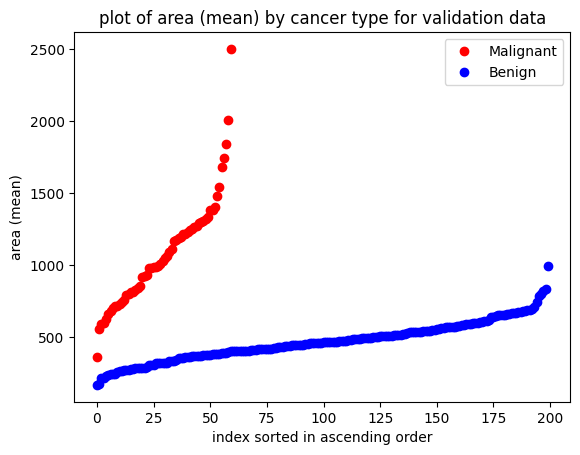

In [10]:
plt.plot(sorted(data_validation_malignant[data_column]), label="Malignant", color="red", marker='o', linestyle='')
plt.plot(sorted(data_validation_benign[data_column]), label="Benign", color="blue", marker='o', linestyle='')
plt.xlabel("index sorted in ascending order")
plt.ylabel(data_column)
plt.title(f"plot of {data_column} by cancer type for validation data")
plt.legend()
plt.show()

<h3>c) Reprezentacja liniowa i kwadratowa dla zbiorów danych</h3>

Reprezentacja liniowa

In [11]:
# Training data linear representation
linear_data_training = data_training.drop(["patient ID", "Malignant/Benign"], axis="columns").values

# Validation data linear representation
linear_data_validation = data_validation.drop(["patient ID", "Malignant/Benign"], axis="columns").values

Reprezentacja kwadratowa

In [12]:
# Features for the quadratic representation
quad_features = ["radius (mean)", "perimeter (mean)", "area (mean)", "symmetry (mean)"]

# Training data quadratic representation
data_training_quad_features = data_training[quad_features].values
quad_data_training = np.hstack((
    data_training_quad_features,
    data_training_quad_features ** 2,
    data_training_quad_features[:, 0][:, np.newaxis] * data_training_quad_features[:, 1:4],
    data_training_quad_features[:, 1][:, np.newaxis] * data_training_quad_features[:, 2:4],
    data_training_quad_features[:, 2][:, np.newaxis] * data_training_quad_features[:, 3:4]
))

# Validation data quadratic representation
data_validation_quad_features = data_validation[quad_features].values
quad_data_validation = np.hstack((
    data_validation_quad_features,
    data_validation_quad_features ** 2,
    data_validation_quad_features[:, 0][:, np.newaxis] * data_validation_quad_features[:, 1:4],
    data_validation_quad_features[:, 1][:, np.newaxis] * data_validation_quad_features[:, 2:4],
    data_validation_quad_features[:, 2][:, np.newaxis] * data_validation_quad_features[:, 3:4]
))

<h3>d) Utworzenie wektora <b>b</b> z informacjami nt. typu raka dla zbiorów danych</h3>

In [13]:
# Cancer type vector for training data
data_training_type_vector = np.where(data_training["Malignant/Benign"] == "M", 1, -1)

# Cancer type vector for validation data
data_validation_type_vector = np.where(data_validation["Malignant/Benign"] == "M", 1, -1)

<h3>e) Znalezienie wag dla obu reprezentacji danych treningowych</h3>

In [14]:
# Linear representation weights
data_training_linear_weights = np.linalg.solve(
    linear_data_training.T @ linear_data_training, linear_data_training.T @ data_training_type_vector
);

# Quadratic representation weights
data_training_quad_weights = np.linalg.solve(
    quad_data_training.T @ quad_data_training, quad_data_training.T @ data_training_type_vector
);

<h3>f) Wagi dla reprezentacji liniowej przy użyciu SVD i dla reprezentacji zregularyzowanej</h3>

In [15]:
# Linear representation weights using SVD
data_training_linear_weights_svd = sp.linalg.lstsq(linear_data_training, data_training_type_vector)[0]

# Regularized linear representation weights
regularization_lambda = 0.01
data_training_linear_weights_regularized = np.linalg.solve(
    linear_data_training.T @ linear_data_training + regularization_lambda * np.identity(linear_data_training.shape[1]),
    linear_data_training.T @ data_training_type_vector
)

<h3>g) Współczynniki macierzy dla reprezentacji danych treningowych</h3>

In [16]:
# Condition for linear representation
data_training_linear_cond = np.linalg.cond(linear_data_training.T @ linear_data_training)

# Condition for quadratic representation
data_training_quad_cond = np.linalg.cond(quad_data_training.T @ quad_data_training)

# Print the values of conditions
print(f"Współczynnik uwarunkowania reprezentacji liniowej: {"{:e}".format(data_training_linear_cond)}")
print(f"Współczynnik uwarunkowania reprezentacji kwadratowej: {"{:e}".format(data_training_quad_cond)}")

Współczynnik uwarunkowania reprezentacji liniowej: 1.809248e+12
Współczynnik uwarunkowania reprezentacji kwadratowej: 9.056815e+17


<h3>h) Przewidywanie typu nowotworu</h3>

In [17]:
# Get prediction results for given validation matrix, weights vector and expected_values_vector
def get_prediction(matrix, weights, expected_values):
    dot_product = matrix @ weights
    predicted_values = np.where(dot_product > 0, 1, -1)
    TP = np.sum((predicted_values == 1) & (expected_values == 1))
    TN = np.sum((predicted_values == -1) & (expected_values == -1))
    FP = np.sum((predicted_values == 1) & (expected_values == -1))
    FN = np.sum((predicted_values == -1) & (expected_values == 1))
    acc = (TP+TN) / (TP+TN+FP+FN)
    result = {
        "TP": TP,
        "TN": TN,
        "FP": FP,
        "FN": FN,
        "acc": acc,
    }
    return result

def print_confusion_matrix(prediction_result):
    print("\t\t\tActually positive:\tActually negative:")
    print(f"Predicted positive:\tTP - {prediction_result["TP"]}\t\t\tFP - {prediction_result["FP"]}")
    print(f"Predicted positive:\tFN - {prediction_result["FN"]}\t\t\tTN - {prediction_result["TN"]}")
    print(f"\tAccuracy: {"{:.3f}".format(100*prediction_result["acc"])}%")

<h4>Wypisanie macierzy pomyłek dla danych metod</h4>

Liniowa:

In [18]:
print_confusion_matrix(get_prediction(linear_data_validation, data_training_linear_weights, data_validation_type_vector))

			Actually positive:	Actually negative:
Predicted positive:	TP - 58			FP - 6
Predicted positive:	FN - 2			TN - 194
	Accuracy: 96.923%


Kwadratowa:

In [19]:
print_confusion_matrix(get_prediction(quad_data_validation, data_training_quad_weights, data_validation_type_vector))

			Actually positive:	Actually negative:
Predicted positive:	TP - 55			FP - 15
Predicted positive:	FN - 5			TN - 185
	Accuracy: 92.308%


Liniowa przy użyciu SVD:

In [20]:
print_confusion_matrix(get_prediction(linear_data_validation, data_training_linear_weights_svd, data_validation_type_vector))

			Actually positive:	Actually negative:
Predicted positive:	TP - 58			FP - 6
Predicted positive:	FN - 2			TN - 194
	Accuracy: 96.923%


Zregularyzowana liniowa:

In [21]:
print_confusion_matrix(get_prediction(linear_data_validation, data_training_linear_weights_regularized, data_validation_type_vector))

			Actually positive:	Actually negative:
Predicted positive:	TP - 55			FP - 1
Predicted positive:	FN - 5			TN - 199
	Accuracy: 97.692%
